# Inferential statistics
Often, we are not only interested in describing our data with descriptive statistics like the mean and standard deviation, but want to know whether two or more sets of measurements are likely to come from the same underlying distribution. We want to draw inferences from the data. This is what inferential statistics is about.

To learn how to do this in python, let's use some example data:

To test whether a new wonder drug increases the eye sight, Linda and Anabel ran the following experiment with student subjects:

Experimental subjects were injected a saline solution containing 1nM of the wonder drug. Control subjects were injected saline without the drug. 
The drug is only effective for an hour or so. To assess the effect of the drug, eye sight was scored by testing the subjects' ability to read small text within one hour of drug injection.

However, Linda and Anabel used two different experimental designs:
1. Linda tested each student on ten consecutive days and measured the performance only after the experiment. She used 50 control (saline only) and 50 experimental subjects (saline+drug) - so 100 subjects in total.
2. Anabel only performed a single test per subject, but she measured the eye sight 30 minutes before and 30 minutes after the treatment. She tested 60 different subjects.

Our task is now to decide whether the wonder drug really improves eye sight as tested in these two sets of experiments.

Let's start with the first dataset:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

plt.style.use('ncb.mplstyle')

In [4]:
# load and explore the data
df1 = pd.read_csv('dat/5.03_inferential_stats_design1.csv')  # Linda's data
display(df1)

,animal,treatment,score_after
0,0,0,10.053951
1,0,0,5.894092
2,0,0,13.447026
3,0,0,6.579613
4,0,0,8.482990
...,...,...,...
995,99,1,12.000260
996,99,1,12.277938
997,99,1,13.718489
998,99,1,14.272301


## What do we need to know about the data to choose the correct statistical tests?
We want to determine whether the treatment improves of eye sight. 
What is our _Null Hypothesis_, what is our _Alternative Hypothesis_?

- Null hypothesis:
- Alternative hypothesis:

What does inferential statistics do?
With some probability:
- prove the Null?
- disprove the Null?
- prove the Alternative?
- disprove the Alternative?


What decisions do we need to make to select the correct test?
- ?
- ?
- ?
- ?

Okay, but what is the first thing you do when you get a bunch of data? Plot it!! Why? Can't we just look at summary statistics? No, they are not sufficient to fully describe the distribution and can be misleading!!

Anscombe's quartet is a famous example that illustrates that fact. It shows 4 sets of data:

![](fig/850px-Anscombe's_quartet_3.svg.png)

These four data sets are very different, but they have similar statistics:
- Mean of x: 9
- Sample variance of x: 11
- Mean of y: 7.50
- Sample variance of y:	4.125
- Correlation between x and y:	0.816
- Linear regression line: y = 3.00 + 0.500x
- Coefficient of determination of the linear regression $R^{2}$: 0.67

An even more extreme example - the data dinosaur:
<!-- ![](fig/DinoSequential-1.gif) -->

Let's start with analyzing the first dataset:

In [5]:
df1

,animal,treatment,score_after
0,0,0,10.053951
1,0,0,5.894092
2,0,0,13.447026
3,0,0,6.579613
4,0,0,8.482990
...,...,...,...
995,99,1,12.000260
996,99,1,12.277938
997,99,1,13.718489
998,99,1,14.272301


Let's plot the data:

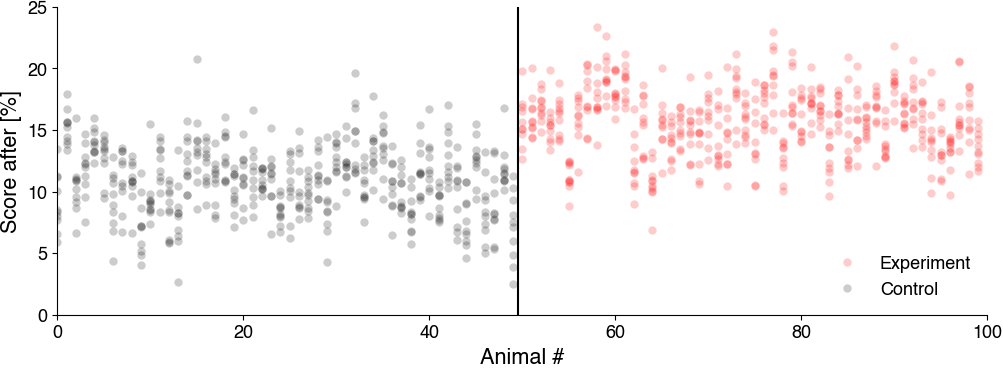

In [10]:
# Split DataFrame into treatment and control parts
experiment = df1[df1['treatment']==1]
control = df1[df1['treatment']==0]

# plot animal id (x-axis) vs. scores (y-axis)
plt.figure(figsize=(12, 4))
plt.plot(experiment['animal'], experiment['score_after'], 'or', alpha=0.2, label='Experiment')
plt.plot(control['animal'], control['score_after'], 'ok', alpha=0.2, label='Control')
plt.xlabel('Animal #')
plt.ylabel('Score after [%]')
plt.axvline(49.5, c='k')
plt.legend()
plt.show()

### Are all samples independent? Are they paired or unpaired?

### One-sided or two-sided?

![](5.03_inferential_stats_1.png)

### Is the data normally distributed?
The t-test assumes that the data in the sample are normally distributed in the population. This means that the values within each group or sample should follow a normal (Gaussian) distribution. This assumption is related to the parameters of the normal distribution, such as the mean and standard deviation.

To check for normality, we visualize the distributions, then run a statistical test. In `scipy.stats`, there are multiple tests for normality. We will use `scipy.stats.normaltest`, which uses the skew and kurtosis as statistics.

In [13]:
# histogram the data


### Mini exercise: Test for normality
Do we run the test on the full dataset? Or on the individual groups (treatment and control) separately?

How do we interpret the p-values? What's the null hypothesis when we test for normality?

In [ ]:
# your solution here

If the p-value is less than the significance level, you may reject the null hypothesis and conclude that there is a statistically significant difference. This means:
- With 95% probability, the sample does not originate from a normal distribution with the mean value μ0.
- In 5% of cases, however, the significant difference may have been a result of chance, within the distribution of the null hypothesis.

### Equal variance?
The independent samples t-test (and its variants) assumes that the variances within the groups being compared are equal (homoscedasticity). In other words, it assumes that the spread or dispersion of the data is consistent across groups. This assumption is also related to population parameters. 

However, homoscedasticity is not a hard criterion, since there exitss a variant of the t-test - Welch's t-test - that accounts for unequal variance (heteroscedasticity).

Homoscedasticity is typically tested visually - by inspecting the data distributions - and rarely tested in practice. There do exist tests that compare the variance across multiple groups, like Levene test (`scipy.stats.levene`).

But, it's best to use statistical tests that do not require equal variance, like Welch's variant of the t-test).

### Mini Exercise: Run the tests
We now know all we need to know about our samples to select the correct test:
- paired or unpaired: ?
- normal: ?
- homoscedasticity: ?
- one/two-sided: ?

Check the docs to figure out how to use the correct test:
- unpaired (independent):
    - parametric: `scipy.stats.ttest_ind` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
    - non-parametric (for non-normal data): `scipy.stats.mannwhitneyu` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html))
- paired (or related):
    - parametric: `scipy.stats.ttest_rel` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))
    - non-parametric (for non-normal data): `scipy.stats.wilcoxon` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html))

In [12]:
# your solution here

#### If you want to compare more than two groups

First, detect group-level effects using 
- Anova: `scipy.stats.f_oneway`
- non-parameteric alternative: Kruskal-Wallis test `scipy.stats.kruskal`

If p<0.05, there exist a difference between the groups.

To then detect which groups are different, you run a post hoc test:

`scipy.stats.tukey_hsd` or `scipy.stats.dunnett`

You will do this in one of the bonus exercises.